In [0]:
#Libraries 
#!pip install imageio
import sys
import os
import tarfile
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D,MaxPooling2D , Flatten




In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
xtrain=np.load('gdrive/My Drive/Colab Notebooks/X_train_64.npy')
xtest=np.load('gdrive/My Drive/Colab Notebooks/X_test_64.npy')
ytrain=np.load('gdrive/My Drive/Colab Notebooks/y_train_64.npy')
ytest=np.load('gdrive/My Drive/Colab Notebooks/y_test_64.npy')

In [7]:
#create model
model = Sequential()

# Convolution layer 1
model.add(Convolution2D(filters = 16, kernel_size = (2,2),padding = 'Same', 
                         activation ='relu', kernel_regularizer=regularizers.l2(0.01),
                        input_shape = (64, 64, 3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Convolution layer 2
model.add(Convolution2D (filters = 32, kernel_size = (2,2),padding = 'Same', 
                         activation ='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Convolution layer 3
model.add(Convolution2D (filters = 64, kernel_size = (2,2),padding = 'Same', 
                         activation ='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Convolution layer 4
model.add(Convolution2D (filters = 128, kernel_size = (2,2),padding = 'Same', 
                         activation ='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Convolution layer 5
model.add(Convolution2D (filters = 256, kernel_size = (2,2),padding = 'Same', 
                         activation ='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


# Flatten
model.add(Flatten()) 

# Fully connected layer 
model.add(Dense(units = 1000)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.2))

#Output layer with 120 nodes
model.add(Dense(120, activation = 'softmax')) 
# Compile model

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())
model_history = model.fit(xtrain, ytrain, epochs=20, batch_size=64,validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
__________

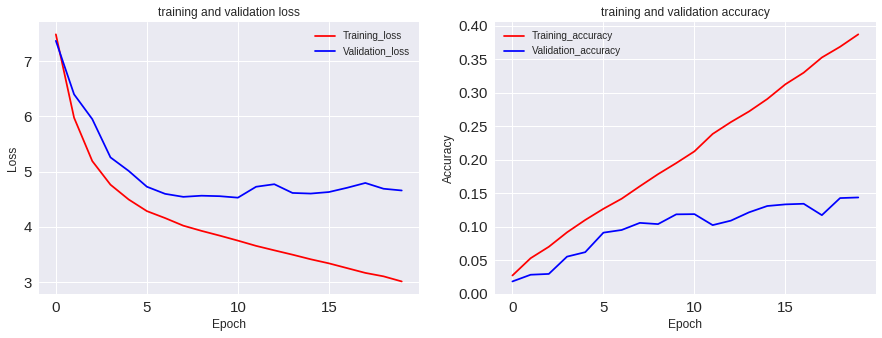

In [8]:
def get_plots(model):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot((model.history['loss']), 'r', label='Training_loss')
    ax1.plot((model.history['val_loss']), 'b' ,label='Validation_loss')
    ax1.set_xlabel(r'Epoch', fontsize=12)
    ax1.set_ylabel(r'Loss', fontsize=12)
    ax1.legend()
    ax1.set_title("training and validation loss")
    ax1.tick_params(labelsize=15)


    ax2.plot(model.history['acc'], 'r', label='Training_accuracy')
    ax2.plot(model.history['val_acc'], 'b' ,label='Validation_accuracy')
    ax2.set_xlabel(r'Epoch', fontsize=12)
    ax2.set_ylabel(r'Accuracy', fontsize=12)
    ax2.legend()
    ax2.set_title("training and validation accuracy")
    ax2.tick_params(labelsize=15)

get_plots(model_history)

In [9]:
scores = model.evaluate(xtest, ytest, verbose=0)
print(" The test accuracy is {}".format(scores[1]*100))

 The test accuracy is 13.726919339526267
